# Accessing and managing groups
Groups are collaborative spaces in your GIS where your users share related content. Groups support metadata allowing you to customize them as per their theme. You can add users to a group with different group related privileges. Refer to the [topic on groups](https://doc.arcgis.com/en/arcgis-online/share-maps/groups.htm) to learn more about them.

In the `gis` module, groups are represented using instances of `Group` class. Similar to `Items`, `Users`, `Roles`, an instance of a resource manager class called `GroupManager` is used to create, search and provide you access to `Group` objects. As with other resource manager objects, you would not create an instance of `GroupManager` using its constructor, but access it from the `groups` property of the `GIS` object.

In this guide, we will observe
 * [Searching for groups](#searching-for-groups)
 * [Properties of a group](#properties-of-a-group)
 * [Creating new groups](#creating-new-groups)
  * [Sharing content to groups](#sharing-content-to-groups)
 * [Managing your groups](#managing-your-groups)

<a id="searching-for-groups"></a>
## Searching for groups
You can search for groups by using the `search()` method of `GroupManager` object. The `search()` method accepts standard [ArcGIS REST API queries](http://resources.arcgis.com/en/help/arcgis-rest-api/#/Search_reference/02r3000000mn000000/). To illustrate this better, let us connect to ArcGIS Online anonymously and search for public groups that have the word 'urban' in the title.

In [ ]:
from arcgis.gis import GIS
ago_gis = GIS()
urban_groups = ago_gis.groups.search('title:urban', max_groups=15)
urban_groups

[<Group title:"Arizona Urban Tree Map" owner:w_grunberg>,
 <Group title:"BSU GIS Students Urban Planning Plan 412" owner:magyar123>,
 <Group title:"Center on Urban Poverty and Community Development" owner:neocando_CWRU>,
 <Group title:"Chicago Urban Planners" owner:vziols2>,
 <Group title:"City of Toronto Urban Forestry" owner:jmcmeek>,
 <Group title:"Claremont Urban Tree Initiative" owner:claremontcolleges>,
 <Group title:"CP255 Urban Applications of Geographic Information Systems" owner:CP255_Instructor>,
 <Group title:"CRP 3851/5851 Special Topics in Urban Design: Sustainable Adaptation of Large Modern Footprints (Fall 2014)" owner:bnb29_CUGIS>,
 <Group title:"CURSO_ARC_URBAN" owner:JulianaOnzi>,
 <Group title:"D.C. urban agriculture" owner:amandahuron>,
 <Group title:"EEA Urban Atlas" owner:apldemo>,
 <Group title:"Environment & Urban Design" owner:Sharon.Burns_NZTA>,
 <Group title:"Esri France Urban Observatory" owner:UOdocent>,
 <Group title:"Ethiopia Ministry of Urban Developmen

The `search()` method returns a list of objects of type `arcgis.gis.Group`. When using the Jupyter notebook environment, `Group` objects can be represented in rich HTML with their thumbnail and metadata information.

In [ ]:
urban_groups[3]

<Group title:"Chicago Urban Planners" owner:vziols2>

You can expand the query string to include multiple fields on a group such as `owner`, `description` etc. Let us look for groups created and owned by account `esri`.

In [ ]:
esri_owned_groups = ago_gis.groups.search(query='owner:esri and description:basemaps', max_groups=15)
esri_owned_groups

[<Group title:"Antarctic Maps" owner:esri>,
 <Group title:"ArcGIS Online Basemaps" owner:esri>,
 <Group title:"ArcGlobe Basemaps" owner:esri>,
 <Group title:"ArcMap Basemaps" owner:esri>,
 <Group title:"Arctic Maps" owner:esri>,
 <Group title:"Community Basemaps" owner:esri>,
 <Group title:"Esri Maps and Data" owner:esri>,
 <Group title:"Living Atlas: Community Maps" owner:esri>,
 <Group title:"Vector Basemaps (Beta)" owner:esri>]

<a id="properties-of-a-group"></a>
## Properties of a group
You can query the metadata and related information about a group by querying the properties of its corresponding `Group` object:

In [ ]:
antartic_basemaps = esri_owned_groups[0]
antartic_basemaps.access

'public'

Let us print some more of the properties of this group

In [ ]:
import time
print(antartic_basemaps.groupid, antartic_basemaps.isFav, antartic_basemaps.isInvitationOnly)
print(antartic_basemaps.owner)
time.localtime(antartic_basemaps.created/1000)

6cd54e197601410e81a2cbcc9c3e1f22 False True
esri


time.struct_time(tm_year=2016, tm_mon=6, tm_mday=23, tm_hour=15, tm_min=49, tm_sec=45, tm_wday=3, tm_yday=175, tm_isdst=1)

Once you know the `id` of a group, you can access it using the `get()` method of the `GroupManager` object:

In [ ]:
ago_gis.groups.get(antartic_basemaps.groupid)

<Group title:"Antarctic Maps" owner:esri>

<a id="creating-new-groups"></a>
## Creating new groups
You can create new groups by calling the `create()` method of the `GroupManager` object. This method similar to other create methods of resource manager objects, returns you an instance of the `Group` object it created.

Let us create a new group for geocaching enthusiasts in our GIS.

<Group title:"Recreational geocaching" owner:arcgis_python_api>
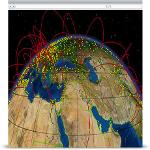

In [ ]:
# connect to GIS with credentials
gis = GIS("https://portal url", "username", "password")
geocaching_group = gis.groups.create(title='Recreational geocaching',
                                    tags = 'hobby, geocaching, gps, hide n seek',
                                    description = 'Group to share your landmarks and games',
                                    snippet = 'Share your GPX tracks as feature layers here',
                                    access = 'org',
                                    is_invitation_only = 'False',
                                    thumbnail = r'D:\temp\geocaching.jpg')
geocaching_group

<a id="sharing-content-to-groups"></a>
### Sharing content to groups
In an ArcGIS Org, an `Item` can have 4 privacy levels - `private`, `group`, `org`, `everyone`. When an `Item` is shared to a group, all members of a group get to view it. Similarly, when shared to an organization, all authenticated members of the org can view it. When shared to everyone, and if the org permits anonymous access, the item is public and accessible to anyone and does not have to be a logged in user.

To share an `Item` to a group, call the `share()` method of the `Item` object and pass the id of the group.

In [ ]:
forest_falls_game = gis.content.get('252c3a4d2c64428c9ffccffe2ae0ff1e')
forest_falls_game.access

'private'

In [ ]:
# this item is private, let us share it to the group so other enthusiasts can enjoy this map
forest_falls_game.share(groups=geocaching_group.id)

{'itemId': '252c3a4d2c64428c9ffccffe2ae0ff1e', 'notSharedWith': []}

<a id="managing-your-groups"></a>
## Managing your groups

### Listing contents of the group
As the first step in managing your groups, let us view the items shared with the group by using the `content()` method

In [ ]:
geocaching_group.content()

[<Item title:"game_summer_lake_elsinore" type:Image Service owner:arcgis_python_api>,
 <Item title:"summer_game_forest_falls" type:Image Service owner:arcgis_python_api>,
 <Item title:"winter_marshlands" type:Image Service owner:arcgis_python_api>]

### Adding users to the group
Now our group has sufficient details and content to make it useful for others. Let us add some users. You can either add users using the `add_users()` method and specify the list of usernames, or if you wish to leave joining to their choice, you can invite them to the group using the `invite_users()` method.

In [ ]:
# let us add publisher1 and publisher2 to this group
geocaching_group.add_users(['publisher1', 'publisher2', 'demo_user1'])

{'notAdded': []}

The method returns a dictionary with information on which users could not be added. As seen on the guide for [managing users](/accessing-and-managing-users), users could have custom privileges  preventing them from joining groups. In such occasions, you would get the names of those users in this return list.

### Removing users from a group
You can remove users from a group by calling the `remove_users()` method and passing the list of usernames to be removed. The method returns you a dictionary containing those users who cannot be removed.

In [ ]:
# remove the demo_user1 account wrongly added to this group
geocaching_group.remove_users(['demo_user1'])

{'notRemoved': []}

In [ ]:
# can you remove the owner of the group?
geocaching_group.remove_users(['arcgis_python_api'])

{'notRemoved': ['arcgis_python_api']}

Thus, you cannot remove the owner or admin of the group until you reassign the ownership to another user.

### Listing users belonging to a group
You can list the users in a group by calling the `get_members()` method. The method returns a dictionary that not only gives you the member list, but also the owner, admin and users.

In [ ]:
geocaching_group.get_members()

{'admins': ['arcgis_python_api'],
 'owner': 'arcgis_python_api',
 'users': ['publisher2', 'publisher1']}

### Updating a group
You can update any or all the fields of a group that you specified when creating it. Thus, the `update()` accepts the same parameters as `create()`. Let us close the group to members who can be added through invitation only. This prevents users from sending a joining request.

In [ ]:
geocaching_group.update(is_invitation_only=True)

True

In [ ]:
geocaching_group.isInvitationOnly

True

### Terminating a group
If a group no longer serves the purpose or if its requirements have changed, the owner and members have a few options. They can leave the group by calling the `leave()` method. When users leave a group, the content they shared with the group will automatically be unshared. The owner or org admin can delete the group by calling the `delete()` method. However if the contents and the group have to be preserved, the group's ownership can be transferred by calling the `reassign_to()` and specifying the new owner's username.

In [ ]:
# let us reassign ownership to publisher1
geocaching_group.reassign_to(target_owner = 'publisher1')

True

In [ ]:
# let the logged in user leave the group
geocaching_group.leave()

True

In [ ]:
# now query the group's members to confirm the new onwer and member list
geocaching_group.get_members()

{'admins': ['publisher1'], 'owner': 'publisher1', 'users': ['publisher2']}

Now that the current user 'arcgis_python_api' has left, let us confirm this user's items are no longer shared with the group

In [ ]:
geocaching_group.content()

[]

Finally, let us delete this group

In [ ]:
geocaching_group.delete()

True